<a target="_blank" href="https://colab.research.google.com/github/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Lecture%202.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


<font size="8" color ="Brown">
 Video Coding (Prof. Gerald Schuller)

# Python Video Processing
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">The OpenCV library also gives us the ability
to stream data directly from a webcam, such
as the Raspberry Pi to the computer!
For this purpose, the command is:<br>

```cap=cv2.VideoCapture(0)```
<br>
This accesses the default camera 0, which,
for example, is the inserted USB webcam.
"Cap" contains a pointer to the address of
this camera.<br>
We can read a frame of this stream as:<br>

```[retval, frame]=cap.read()```
<br>
where "retval" is a return value (says if
everything is fine, and "frame" contains the
frame thus exctracted.<br>
With<br>


```cv2.imshow('frame',frame)```<br>
we can display this frame in a window.<br>
With<br>


```cv2.waitKey(1)```<br>

the window is opened by cv2.imshow (it
does not open without waitKey. and is kept
open for as long prompted by waitKey. The
argument of waitKey tells the function, how
many milliseconds to wait for a key stroke.
The function cv2.waitkey is only active when
the associated window is active (if clicked on
it). Only when this window is active,
cv2.waitKey responds to the keystrokes!
When we do this in an infnite loop, we get
the live video from the camera in the
window. A sample program is shown as
here:


</font></p>

In [ ]:
import cv2
#Program to capture a video from the default camera (0)
#and display it live on the screen
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    [retval, frame] = cap.read()
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

<p style="line-height:1.5">
<font size="6">
This program is stored as "videorecdisp.py"
and then called from console window with:<br>
    
    
```python videorecdisp.py```
<br>
and we obtain the live video. We can end
the display with typing “q”.<br>
A practical application is e.g. a "pipe
camera" with goose-neck for the inspection
of pipes.<br>
The following example shows the contents of
the upper left pixel of the video at the start
of the program:<br>
    </font></p>

In [ ]:
import cv2
#Program to capture an image from a camera
#and display the pixel value on the screen
cap = cv2.VideoCapture(0)
 # Capture one frame
[ret, frame] = cap.read()
print(ret)
print("image format: ", frame.shape)
print("pixel 0,0: ",frame[0,0,:])
cap.release()

True
image format:  (480, 640, 3)
pixel 0,0:  [123 136 129]


<p style="line-height:1.5">
<font size="6">
Save the program under
"pyimageshowpixel.py" and start it with:<br>

```python pyimageshowpixel.py```
                   <br>
With Output:<br>
'image format: ', (480, 640, 3))<br>
('pixel 0,0: ', array([ 35, 167, 146],
dtype=uint8))<br>
Note that we only had addressed the pixels,
so only 2 indices: frame[0,0,:].The colon
":" means that all the indices of these
dimensions are addressed.<br>
In this way, we can also address an index
range, via, Start:End, e.g, 0:3 addresses the
indices 0,1,2 and onwards (Note: Not the
last value, 3).<br>
In our case, the above notation is identical
to:<br>
```frame[0,0,0:3]```<br>
At the output, we, therefore, do not get a
single value but a special array with the
values of the 3 primary colors, in the order
BGR. Here "Red" has the value 146, green
167, and blue 35.<br>
We can also observe the numeric
representation in "uint8",i.e. unsigned
integer with 8 bits, hence a number between
0 and 255 (= $2^8−1$ ).<br>
With the program “videorecdispRGB.py”<br>
we can see the separate R, G, and B
components of our video stream, with the
command line<br>
```python videorecdispRGB.py```<br>
Observe: if you hold e.g. a red paper in front of the
camera, only the red component will show it bright, as
expected.<br></font></p>

<font size="8" color ="Brown">
# A simple Encoder/Decoder Framework
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">We start with a simple encoder and decoder
framework in Python.<br>
<ul style="line-height:1.5">   
    <li>The encoder framework simply takes each frame of
our video sequence and appends it to our video file, for
now uncompressed in a text format.</li>
<li> The decoder framework reads one frame after the
other from this file and displays it on screen.</li> </ul>    </font></p>

![Lecture2-1.png](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-1.PNG?raw=1)

<p style="line-height:1.5">
<font size="6">
During the course you are supposed to add more and
more functonality to this framework, such that the
video file becomes smaller and smaller.<br>
The encoder framework is in the file<br>
videoencframewk.py:</font></p>

In [ ]:
import numpy as np
import cv2
import sys
if (sys.version_info[0]<3):
    import cPickle as pickle
else:
    import pickle

#Program to capture video from a camera and store it in a
#recording file, in Python txt format, using cPickle
#This is a framework for a simple video encoder to build.
#It writes into file 'videorecord.txt'
#Gerald Schuller, April 2015

cap = cv2.VideoCapture(0)

f=open('videorecord.txt', 'wb')

#Process 25 frames:
for n in range(25):

    ret, frame = cap.read()

    if ret==True:
        #show captured frame:
        cv2.imshow('frame',frame)

        #Here goes the processing to reduce data...
        reduced = frame.copy()
        reduced=np.array(reduced,dtype='uint8')
        # for the Cb and Cr components use the int8 type
        #"Serialize" the captured video frame
        #(convert it to a string)
        #using pickle, and write/append it to file f:
        pickle.dump(reduced,f)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
f.close()
cv2.destroyAllWindows()


<p style="line-height:1.5">
<font size="6">    Start it in a terminal shell with command:<br>
    
    
```python videoencframewk.py```

<br>
Observe that we use the package “pickle”. This is
convenient because it turns an object, like the tensor of
our video frame, into a serial string, which then can be
easily stored in a file, and vice versa for the decoder
framework, which we start with<br>

```python videodecframewk.py```<br>

Observe that 25 frames of our video (about 1 second
standard TV quality) in our simple, uncompressing
framework result in a file size of already over 40 MB!<br><br>
</font></p>



    

In [ ]:
import numpy as np
import cv2
import sys
if (sys.version_info[0]<3):
    import cPickle as pickle
else:
    import pickle

#Program to open a video input file 'videorecord.txt' (python txt format using pickle) and display it on the screen.
#This is a framework for a simple video decoder to build.
#Gerald Schuller, April 2015

f=open('videorecord.txt', 'rb')

for i in range(24):

#load next frame from file f and "de-pickle" it, convert from a string back to matrix or tensor:
    reduced=pickle.load(f)

    #here goes the decoding:
    framedec=reduced.copy()


    cv2.imshow('Video',framedec)
    #Wait for key for 50ms, to get about 20 frames per second playback
    #(depends also on speed of the machine, and recording frame rate, try out):
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break
f.close()
cv2.destroyAllWindows()


<font size="8" color ="Brown">
# The need for compression:
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">Assume out short video clip of 1 second duration,
640x480 resolution, 25 pictures per second, and 8 bits
per pixel and primary color.<br>
Hence we have $8 * 3 * 640 * 480$ bits per frame, times
25 frames per second..<br>
This results to 184 Mbit/s or ca. 23 Mbyte/s!
(Our framework has about twice as much because it
uses a text format).<br>
Observe: HD Video would be about 2 MegaPixel
(1920x1080 pixel).<br>
This is particularly a problem if we want to stream a
video, to transmit it: DSL usually has max. 16 Mb/s. But
it is already possible to stream HD video over DSL! This
shows the power of compression. Example: with good
compression, HD video can be transmited with about 4
Mb/s (from about 480 Mb/s uncompressed).<br>
How does this compression work? There are 2 basic
principles:<br><br>
1) Irrelevance reducton<br>
2) Redundancy reducton<br><br>
Both are necessary to obtain the most compression.<br>
**Irrelevance reducton:** This principle looks at the
receiver of our data, in this case the human eye. We
only need to transmit informaton that the eye can
observe or detect. But observe that for this we need
assumptions about the context in which the eye sees
our signal (video); for instance the viewing distance,
the size of the monitor, the brightness of the monitor
and of the surroundings. For this reason we have
specifically determined viewing environments for
perceptual measurements.<br><br>
**What are the usual propertes of the eye used for
compression?**
    </font></p>
    
    
![Lecture2-1.PNG](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-2.PNG?raw=1)

<p style="line-height:1.5">
<font size="6">
    We have about **110 Mio. rods**, which are sensitve to
intensity/luminance (not color), and about **6 Mio
cones**, which are sensitive to the electromagnetic
wavelength spectrum of the 3 fundamental colors (red,
green, blue). The specific spectral sensitvity of the 3
types of cones can be seen in the following diagram:<br><br>
    </font></p>
    
![Lecture2-2.PNG](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-3.PNG?raw=1)    

<p style="line-height:1.5">
    <font size="6"><br>
Observe that the red cones have a “sidelobe” in the
blue range (about 450 nm). This has the consequence
that we can distinguish spectrally pure colors (colors of
only one wavelength) in the range between about 400
to 450 nm as different colors (blue to purple).<br>
Otherwise they would all appear as blue! It is thought
that this sidelobe developed when our ancestors in
ancient times (early mammals) became active during
daylight, and needed more color vision after the
Dinosaurs died out. Dinosaurs where always active in
daylight, as are their descendants the birds, who have 4
or 5 types of color sensitve cones (more sensitvity in
the UV range).<br>
We perceive different colors by different mixes of the
relative outputs of the 3 types of cones. To show the
resulting color for each possible mix, we have the color
triangle (CIE color space):<br></font></p>

![Lecture2-3.PNG](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-4.PNG?raw=1)


<br>

<p style="line-height:1.5">
    <font size="6">
        **Observe:** For instance 500 nm (light green) has a
frequency of c/Lambda=300 000km/s / 500 nm=600
THz ($600 *10^12 Hz$), or 600 000 Ghz! Compare: Our TV
satellites use about 10 GHz.<br>
This shows the possibilities of fiber optics to transmit
data.<br>
Those about 6 Mio. cones are unequally distributed on
our retna. They are highly concentrated in the center
of vision, the Fovea, and become more sparse towards
the periphery of vision. This is unlike typical digital
cameras, which have equally distributed sensors.<br>
Also observe the big difference in the number of only
intensity or luminance sensitive rods: There are 110
Mio rods., but only 6 Mio cones. This means that the
eye is much more sensitive for spatial changes in
intensity or luminance than for spatial changes in color!
This is also an important principle in video coding,
where color is usually encoded and transmited with
less spatial resolution. For instance, the color
informaton is subsampled by a factor of 2 vertically
and horizontally.<br>
They are also unequally distributed, with less density
towards the periphery of vision, but with the exception
of the Fovea, where there are only cones at high
density, with no space for rods left.<br>
Rods are also much more light sensitive than cones,
hence they are the main contributor for our night
vision. Unlike the cones, which are tuned to our sun
light, our rods spectral sensitivity is tuned to the
spectrum of our moon light.<br>
We see that the eye has a much higher spatial
resolution, corresponding to about **110 Mega-Pixel, for
luminance** (the intensity or black-and white picture)
than for **chrominance or color**, corresponding to only
about **6 Mega-Pixel**. How can this be used in video
coding?<br>
First of all, luminance (intensity) and chrominance
(color) can be coded differently. For that, we first have
to separate the two, because usual cameras only have
color sensitve sensors (similar to our cones), but they
don’t have intensity sensors, like our rods. Hence we
need to create an **“artifcial rod output”**.<br>
For this we have a color transformation, if we take the
red (R), green (G), and blue (B) channel:<br>
**Intensity** Y= 0.299R + 0.587 G + 0.114 B,<br>
**color component** Cb=0.564(B-Y) =<br>
-0.16864R - 0.33107G + 0.49970B<br>
**color component** Cr=0.713(R-Y)=
        <br>
0.499813R - 0.418531G - 0.081282B
        <br>
This color transform can be written as this matrix
multplicaton,<br>
<br>
  </font></p>
  
  <p style="line-height:1.5">
    <font size="5">
 $\begin{bmatrix} Y \\ Cb \\Cr \end{bmatrix}
 =
  \begin{bmatrix}
   0.299     & 0.587     & 0.114 \\
   -0.16864  & -0.33107  & 0.49970 \\
   0.499813  & -0.418531 & -0.81282
   \end{bmatrix}    
   .
   \begin{bmatrix} R \\ G \\B \end{bmatrix}
   $
<br><br>
</font></p>

<p style="line-height:1.5">
<font size="6">

Here, Cr and Cb are the color/chrominance components,
the **normalized** versions of U and V, such that we can
store the value within a fixed length binary word
(values between -128 and 127).<br>
**Observe**: The values for **R,G,B** are intensity values, and
hence only positve. Usually they are represented by 8
bit integer values without a sign bit. Its range is 0...255.
In Python this type is called “uint8”, for instance in<br>

```np.array(...,dtype='uint8')```<br>

in our videoencframewk.py.<br>
The same is true for the luminance Y. But Cb
and Cr have negative factors in the matrix,
hence their values can also become
negative. Their range is -127...127, which is
8 bit integer with a sign bit. The python type
is “int8”, for instance<br>

```np.array(...,dtype='int8')```
<br>

The color transform is an invertble matrix calculaton,
such that it can be **inverted in the decoder**,<br>
</font></p>
<br>
<p style="line-height:1.5">
    <font size="5">
 $\begin{bmatrix} R \\ G \\B \end{bmatrix}
 =
  \begin{bmatrix}
   0.299     & 0.587     & 0.114 \\
   -0.16864  & -0.33107  & 0.49970 \\
   0.499813  & -0.418531 & -0.81282
   \end{bmatrix}^{-1}    
   .
   \begin{bmatrix} Y \\ Cb \\Cr \end{bmatrix}
   $
<br><br>
 $
 =
  \begin{bmatrix}
   1.0     & 0.0        & 1.4025 \\
   1.0     & -0.34434   & -0.7144 \\
   1.0     & 1.7731     & 0.0
   \end{bmatrix}    
   .
   \begin{bmatrix} Y \\ Cb \\Cr \end{bmatrix}
   $

<br>
</font></p>
<p style="line-height:1.5"><font size="6">
 In this way we obtain one intensity component and 2
color components which contain all the information of
the image. </font></p>
   

<font size="8" color ="Brown">
# Python example:        
</font>
<br>

<p style="line-height:1.5">
<font size="6">We compute the Y, Cb and Cr (or YUV in the nonnormalized
case) components by applying the above
matrix multiplications to each pixel of our frame. It is
best to avoid “for” loops in Python, but instead we can
compute with entire images. So the computation of the
Y image in Python is simply:<br>
$0.299*R+0.587*G+0.114*B$<br>
Where **R,G,B** are the variables which contain
the entire R, G and B images. Then we can
display the resulting Y,U,V videos.<br>
Start the program in a terminal shell with
the command<br>
    
    
```python videorecprocyuv.py```

<br>
**Observe:** The Y video is a monochrome
version as expected. The U and V videos
only contain content if there is color, for
monochrome light they show black. Also
observe how different colors appear at
different channels (U or V).
**Python example for switching on and
off the YUV components**<br>

```python videorecencdecyuvkey.py```
<br>
**Observe:** Turning of the **Luminance**
components Y make the image appear
indeed **less sharp**, because our eyes have a
**reduced spacial resolution for color**.
Turning on and off the color components U
and V shows the **color space** associated
with each of them.<br>
**Compare** this with the original color
components, using our Python app:<br>
```python videorecdispRGBkey.py```<br>
Here we can turn the R,G,B components
individually on and off.<br>
**Observe:** Here, each individual color
component looks still sharp (despite having
just one color), because it still contains the
intensity, the Luminance information. This
shows why we use a color transform.<br><br>
Since our eye has a reduced spatial resolution for **color**,
we can now store or transmit color with a **reduced
spatial resolution**. For simplicity we can apply
downsampling to the color components. In video
coding, different chroma subsampling schemes are
used:<br>

</font></p>


<font size="8" color ="Brown">

# Chroma Subsampling:
        
</font>
<br>

![Lecture2-4.PNG](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-5.PNG?raw=1)

<p style ="line-height:1.5"><font size="6">
<br><br>
White: Luminance<br>
Grey, Dark Grey: Chrominance<br>
[http://de.wikipedia.org/wiki/Farbunterabtastunge](http://de.wikipedia.org/wiki/Farbunterabtastunge)
<br> <br>

You can imagine the naming as the number of samples
for each component along a line. The last name doesn’t
really follow this naming conventon, because it also
has a downsampling along the rows, hence the name
4:2:0 was assigned. This is also the most used scheme
for digital video. 4:2:2 is used for higher quality, and
4:4:4 is used for highest quality video (e.g. raw or
lossless formats).<br ><br>
With the 4:2:0 scheme we can now reduce the required
data rate for the two color components by a factor of
4! (2 in each dimension), at least theoretcally without
visible artefacts!
<br>

</font></p>

<font size="8" color ="Brown">
# Downsampling, Upsampling, Filtering
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">How do we do the downsampling in the
encoder and then the upsampling in the
decoder, such that we don't see artifacts
and such that it is not too complex?<br>
If in the encoder we simply downsample our
image directly, by keeping only every 2nd
sample (or N'th sample in generale, we
might get **aliasing artifacts** if we have fine
patterns in the image.<br>
If in the decoder we simply upsample our
image by inserting N-1 zeros after each
sample in each dimension, we obtain a
„pointy“ image, which results again from
aliasing or spectral copies of our image.<br>
To avoid both, we need to suitably **lowpass**
our image **before downsampling**, and also
**lowpass filter it after upsampling** as a
sort of interpolation.<br><br>
This is what the Nyquist Theorem tells us.
We know it from 1-dimensional signal
processing:
  <br> <br>
    
    
![Lecture2-6.PNG](https://github.com/TUIlmenauAMS/Videocoding/blob/main/LecturesJupterNotebooks/Lecture2/Images-Lecture2/Lecture2-6.PNG?raw=1)

<br><br>Now we just have to think about how to
extend it to 2-dimensional signals like
images.</font></p>

<font size="8" color ="Brown">
# Up- and down sampling in Python
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">In Python we can do the up- and downssampling
using indexing „tricks“ with „:“. For instance take a vector
<br>

```Y=np.array([1,2,3,4])```<br>
Then<br>
```Y[0:4:2] ```
means: Take the values of indices
from 0 to excluding 4 in steps of 2.<br>
```Y[0::2] ```<br>
means: Take the values of indices
from 0 to the end in steps of 2.<br>
Then **down-sampling** with a factor of 2 is
simply:<br>
```Yds=Y[0::2]```<br>

Yds contains the down-sampled signal.
For a **2D signal** and downsampling in each
dimension, Y it would be simply:<br>
```Yds=Y[0::2,0::2]```<br>
For up-sampling you first generate a vector
of zeros:<br>
```Yus=np.zeros(4)```<br>

and then we can assign every 2nd value to
the output:<br>
```Yus[0::2]=Yds```
<br>
For a **2D signal** and upsampling in each
dimension it would be:<br>

```Yus=np.zeros((4,4))
    Yus[0::2,0::2]=Yds
```
<br>                                



**Python example:**<br>
This is shown in the following python
example. We take each frame and
downsample it by N=8 in each dimension,
then upsample it, and display the result.
Start it with:<br>
```
python videofiltresampkey.py
```

<br>

It uses scipy.signal.convolve2d as
convolution or filter function, where we 2Dconvolve
our frame with a 2D „filter kernel“
or 2D impulse response. This is the 2-D
version of a lowpass filter.<br>
The Python program uses two types of low
pass filter:<br>
-filter 1 consists of a 8x8 coefficient square
matrix with entries of 1/8:<br>
```filt1=np.ones((8,8))/8```
<br>
The Graphical View of filt1 is shown in the below python code:
</font></p>

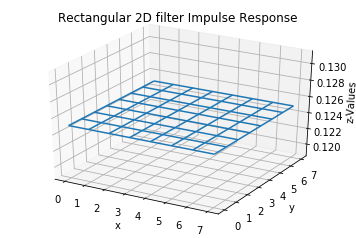

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3d Graph Ploting
filt1=np.ones((8,8))/8
x= np.arange(0,8)
y=x
X,Y=np.meshgrid(x,y) # X,Y Axix for ploting graph
fig= plt.figure()
sub=fig.add_subplot(111,projection="3d")

sub.plot_wireframe(X,Y,filt1)
plt.title("Rectangular 2D filter Impulse Response")
plt.xlabel("x")
plt.ylabel("y")
sub.set_zlabel('z-Values')
plt.show()


<p style="line-height:1.5">
<font size="6">-filter 2 results from convolving filter 1 with
itself:<br><br>

```filt2=scipy.signal.convolve2d(filt1,filt1)/8```
<br><br>
(The division by 8 is a power normalization,
such that the total power of the kernel adds
up to one, or close to it)
This is a 15x15 matrix with the highest value
in the center, with values linearly decaying
towards the boundaries, like a pyramid.<br>
The low pass filter is toggled on/of with
keyboard key 'f', and the filter type is
toggled with key 't'.<br><br></font></p>

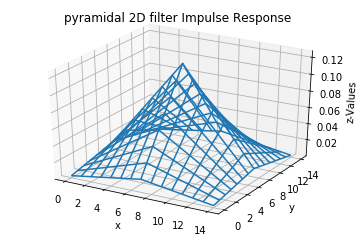

In [ ]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
filt1=np.ones((8,8))/8
filt2=sig.convolve2d(filt1,filt1)/8
z= np.arange(0,15)
X,Y=np.meshgrid(z,z)
fig= plt.figure()
sub=fig.add_subplot(111,projection="3d")


sub.plot_wireframe(X,Y,filt2)
plt.title("pyramidal 2D filter Impulse Response")
plt.xlabel("x")
plt.ylabel("y")
sub.set_zlabel('z-Values')
plt.show()


<p style="line-height:1.5"><font size="6">
 Python example for filtering</font></p>

In [ ]:
#Program to capture a video from a camera, filter is, and display it live on the screen
#Gerald Schuller, October 2014

import numpy as np
import scipy.signal
import cv2

#Downsample factor:
N=8

cap = cv2.VideoCapture(0)
[retval, frame] = cap.read()
[r,c,d]=frame.shape
print(r,c)
Dsy=np.zeros((r,c));


#2D-Mask to set to zero the 7/8 highest frequencies,
#only kep the 1/8 lowest frequencies in each direction:
M=np.ones((r,c))
M[int(r/16.0):int(r-r/16.0),int(c/16.0):int(c-c/16.0)]=np.zeros((int(7.0/8.0*r),int(7.0/8.0*c)));
#Conmpute space-domain/inverse 2D Fourier transform of Low Pass filter:
h=np.abs(np.fft.ifft2(M))
hc=np.concatenate((h[:,int(c/2):c],h[:,0:int(c/2)]),axis=1)
hc=np.concatenate((hc[int(r/2):r,:],hc[0:int(r/2),:]))
#Only keep the part with the biggest components to reduce computations:
hc=hc[int(r/2-4):int(r/2+4),int(c/2-4):int(c/2+4)]
#filt=hc

#High pass filter kernel for edge detection:
#filt=np.matrix([[-1.0,-1.0,-1],[-1,8,-1],[-1,-1,-1]])/1.0;
#Low Pass Kernel:
#rectangular filter kernel:
filt1=np.ones((8,8))/8;
#Triangular filter kernel:
filt2=scipy.signal.convolve2d(filt1,filt1)/8

filteron=False;
#Filter type:
rectfilt=True;

while(True):
    # Capture frame-by-frame
    [ret, frame] = cap.read()
    Y=(0.114*frame[:,:,0]+0.587*frame[:,:,1]+0.299*frame[:,:,2])/256;
    cv2.imshow('Original Y Signal',Y)

    if rectfilt==True:
       filt=filt1;
    else:
       filt=filt2;

    if filteron == True:
       Y=scipy.signal.convolve2d(Y,filt,mode='same')
    #Downsample filtered frame:
    Dsy[0::N,::N]=Y[0::N,::N];
    # Display the resulting filtered frame
    #cv2.imshow('Y LP filtered, down- and upsampled',Dsy)
    #low pass filter the downsampled version to fill picture:

    if filteron==True:
       yfilt=scipy.signal.convolve2d(Dsy,filt,mode='same')
    else:
       yfilt=Dsy.copy()
    #print(Dsy[0:8,0:8])
    cv2.putText(yfilt,"Down- and upsampling and LP filtering Demo", (20,50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,128,128))
    cv2.putText(yfilt,"Toggle LP filter on/off: key f", (20,100), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,128,128))
    cv2.putText(yfilt,"Toggle rect and triang filt. kernel: key t", (20,150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,128,128))
    cv2.putText(yfilt,"Quit: key q", (20,200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,128,128))
    cv2.putText(yfilt,"Filter:"+str(filteron)+"    Rect.Filter:"+str(rectfilt), (20,300), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,128,128))
    cv2.imshow('(LP filtered,) down- and upsampled (, and LP filtered)',yfilt)
    key=cv2.waitKey(1) & 0xFF;
    if key == ord('f'):
       filteron= not filteron;
    if key == ord('t'):
       rectfilt= not rectfilt;
    if key == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


480 640


<p style="line-height:1.5">
<font size="6">
    **Observe:**<br><br>
-Without a lowpass filter, a fine pattern in
the image results in visible aliasing artifacts
in the sampled image.<br>
-Turning on a simple size 8x8 pixel<br>
**rectangular** 2D filter kernel with key 'f'
removes the aliasing artifacts, but leads to
blocking artifacts and noticably slower
computation. The result looks like just larger
pixels. This is also called a **sample and
hold** (hold the value of the sample until the
value of the next sample arrivese.<br><br>
**Observe:** Convolution of our impulse
response with the pulses of our sampled
image results in **placing the impulse
response** at the **place of the pulses**.<br><br>
-Turning on a **pyramid shaped** size 15x15
2D filter with key 't' removes the blocking
artefacts, but leads to even **slower
computation**. The reconstructed image looks
like from a **linear interpolation** between
neigbouring sampled pixels.<br>
**Observe:** Now the pyramid impulse
response appears at the place of the sample
pulses. Adding them up results in the linear
interpolation.<br>
So how do we **design „good“ 2D filters**,
such that we get good results and still
reasonably fast computation?<br>
For that it is helpful to look at the 2D
frequency domain.<br></font></p>

<font size="8" color ="Brown">
# 2D Discrete Fourier Transform
</font>
<br>

<p style="line-height:1.5">
<font size="6">In the mathematical description we will use
**bold-face characters** for **matrices and
vectors** for clarity.<br>
Our image consists of pixel values **x**(*$n_1
, n_2$*)
with position indices $n_1
, n_2$
 in the ranges
$0≤n_1<N_1,0≤n_2<N_2$. <br><br>
    The 2D Discrete Fourier Transform (2D DFT)
gives us this 2D frequency domain, and is
defined as <br><br>
$$X(k_1
, k_2)= \sum_{n_1=0}^
{N_1−1}
\sum_{
n_2=0}^{N_2−1}
x(n_1,n_2)⋅e^{− j.{\frac{π}{N_1}}⋅k_1 n_1}.e^{− j.{\frac{π}{N_2}}⋅k_2.n_2}$$
    
  <br><br>
where $0≤k_1<N_1$ and $0≤k_2<N_2$ are the
frequency indices. The index for the Nyquist
frequency is $k_1=N_1/2$ and $k_2=N_2/2$.
<br>
The 2D-DFT is equvalent to the application
of our **one-dimensional DFT to the rows
and colums** of our image.<br>
In Python this is the function<br>   
```X=numpy.fft.fft2(x)```
<br>

We can plot an intensity plot of the 2D-DFT
coefcients with<br>
```cv2.imshow(numpy.abs(X))```<br>
This way we plot the 2D-DFT as an image,
with the **frequency indices** $k_1
, k_2$ as image **coordinates**, and the magnitude
<br>|**X**$(k_1, k_2)|$ as **brightness**.<br><br>
**Observe:** This is similar to a spectrogram
plot, but instead of the time/frequency axes
we now have the normalized x-frequency $k_2$ and y-frequency $k_1$. <br>
Since we apply a DFT vertically and
horizontally, the lowest frequencies
horiziontally are located at the left and right
corners with $k_2=0$ and $k_2=N_2−1$ , and the
lowest frequencies vertically at the top and
bottom corners. The Nyquist frequency is
located at the center.<br></font></p>

<font size="8" color ="Brown">
# The Inverse 2D-DFT
        
</font>
<br>

<p style="line-height:1.5">
<font size="6">The 2D-DFT can also be inverted, with<br>
</font>
<font size="5">
$$x(k_1
, k_2)=\frac{1}{N_1⋅N_2} \sum_{n_1=0}^
{N_1−1}
\sum_{
n_2=0}^{N_2−1}
X(K_1,K_2)⋅e^{ j.{\frac{π}{N_1}}⋅k_1 n_1}.e^{j.{\frac{π}{N_2}}⋅k_2.n_2}$$
</font>
    <font size="6">
<br><br>In Python:<br>
    
    
```x=numpy.fft.ifft2(X)```<br>
    <br><br>
**Python Example:**<br>
This example takes the webcam input,
computes the Y Luminance component, and
displays it. Then it takes the 2D-DFT and
displays its magnitude in a separate window.
Then it takes the inverse 2D-DFT and
displays it in the fnal third window.
Keyboard key 'f': A low pass can be
switched on, which is implemented in the
2D-DFT domain, by setting the DFT
coefcients of higher frequencies to 0 and
then apply the inverse 2D-DFT. This is done
before the downsampling and after the
upsampling.<br>
Keyboard key 's': Sampling with a factor
of 8 in horizontal and vertical direction is
turned on/of. First downsampling (for the
encodere and then upsampling (for the
decodere.<br>
Start the Python demo with:<br>
    
    
```python videofft0ifftresampleykey.py```<br>
</font></p>

In [ ]:
#Program to capture a video from a camera, compute the Y-component,
#downsample it by a factor of N horizontally and vertically, and display
#it live on the screen
#With keyboard switchable low pass filter and sampling
#key f toggles the low pass filter, key s the sampling
#With explanation text and state display in the image windows.
#Gerald Schuller, April. 2015

import numpy as np
import cv2
#import scipy.signal

cap = cv2.VideoCapture(0)

#cv2.namedWindow('Original')
#cv2.namedWindow('Luminanz Y')
#cv2.namedWindow('Unterabgetastetes Y')

#Low Pass Kernel:
#filt=np.ones((8,8))/16.0;

#Downsampling factor N:
N=4;
[ret, frame] = cap.read()
[rows,cols,c]=frame.shape;
r=rows
c=cols
Ds0=np.zeros((rows,cols));
Ds=Ds0

#Mask to set to zero the 7/8 highest frequencies,
#only kep the 1/8 lowest frequencies in each direction:
#For rows:
Mr=np.ones((r,1))
Mr[int(r/8.0):int(r-r/8.0),0]=np.zeros(int(3.0/4.0*r))
#For columns:
Mc=np.ones((1,c))
Mc[0,int(c/8.0):int(c-c/8)]=np.zeros(int(3.0/4.0*c));
#Together:
M=np.dot(Mr,Mc)

ytext=np.zeros((rows,cols))
cv2.putText(ytext,"Down- and upsampling and LP filtering Demo", (20,50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (1.0))
cv2.putText(ytext,"Toggle LP filter in 2D-FFT on/off: key f", (20,100), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255))
cv2.putText(ytext,"Toggle sampling on/off: key s", (20,150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255))
cv2.putText(ytext,"Quit: key q", (20,200), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255))


filteron=False;
samplingon=False;

while(True):
    #Encoding side:
    # Capture frame-by-frame
    [ret, frame] = cap.read()

    #Berechnung der Luminanz-Komponente Y:
    # Y= 0.114*B+0.587*G+0.299*R :
    # /256 because the result is float values which imshow expects in range 0...1:
    Y=(0.114*frame[:,:,0]+0.587*frame[:,:,1]+0.299*frame[:,:,2])/256;

    cv2.imshow('Encoder, Original: Luminance Y',Y+ytext)

    if filteron==True:
       #2D-FFT of Y
       X=np.fft.fft2(Y)
       #Set to zero the 7/8 highest spacial frequencies in each direction:
       X=X*M
       #inverse 2D-FFT:
       Y=np.abs(np.fft.ifft2(X))

    if samplingon==True:
       #Downgesamplets Y0, nur jedes Nte pixel horizontal und vertikal wir uebertragen:
       Y0=np.zeros((rows,cols));
       Y0[0::N,::N]=Y[0::N,::N];
       Y=Y0.copy()

    #Decoding Side
    #Make text:
    ytext2=np.zeros((rows,cols))
    if samplingon:
       cv2.putText(ytext2,"Sampling on", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0.9))
       #print("sampling on")
    else:
       cv2.putText(ytext2,"Sampling off", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0.9))
       #print("sampling off")

    if filteron:
       cv2.putText(ytext2,"Filter on", (20,50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255))
       #print("filter on")
    else:
       cv2.putText(ytext2,"Filter off", (20,50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255))
       #print("filter off")

    #2D-DFT:
    Dsfft=np.fft.fft2(Y)

    if filteron == True:
       #Lowpass filter the sampled frame:
       #Dsfilt=N*scipy.signal.convolve2d(Ds0,filt,mode='same')
       #Set to zero the 7/8 highest spacial frequencies in each direction:
       Dsfft=Dsfft*M
    #scaling to maintain the energy after sampling and filtering
    if samplingon and filteron:
       Dsfft=Dsfft*N*N
    cv2.imshow('2D Discrete Fourier Transform of (downsampled, filtered) Luminance Y',np.abs(Dsfft)/(480.0)+ytext2)

    #inverse 2D-FFT:
    Y=np.abs(np.fft.ifft2(Dsfft))

    cv2.imshow('Decoder: reconstructed Luminance Y',Y+ytext2)

    #Ende durch Taste "q":
    key=cv2.waitKey(1) & 0xFF;
    if key == ord('s'):
       samplingon = not samplingon;
    if key == ord('f'):
       filteron = not filteron;
    if key == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


<p style="line-height:1.5">
<font size="6">

**Observe:**<br>
-Most coefficients of the 2D-DFT with high magnitudes
appear in the corners, where the low frequencies are
located.<br>
-Holding fine paterns in front of the camera results
also in high magnitudes at higher frequencies, like
brighter rays.<br><br>
-By pushing key “f” we can set most of the high
frequency coefficients to 0 and still get a “good”
picture, just a litle blurry<br><br>
-By pushing key “s” we can turn sampling on/of.
**Without the lowpass filter** the reconstructed image
only has a “latce” of actve pixels. The 2D-DFT image
shows **spectral copies**, aliasing, appearing periodically
in the spectrum.<br><br>
-By then switching the **low pass filter on** we remove or
suppress the spectral copies. As the result, the
reconstructed images looks like before with only the
low pass turned on, and **much beter** than without the
low pass filter!<br><br>
-If we leave the low pass on, we don't see a difference
in the reconstructed image when we toggle sampling
on and off!</font></p>